<a href="https://colab.research.google.com/github/Sravanthiedimpalli/Drug-Recommendation-and-Patient-Analysis-Using-Decision-Tree-Classifier/blob/main/Drug_patient_Analysis_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [ ]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
#take x features dAta and y target data from df
x=df.loc[:,df.columns[1:]]
y=df['Drug']
#replace the "M" as a 1 and "B" as 0
y=y.map({'drugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify and encode categorical columns (object or category dtype)
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical columns (e.g., Gender, etc.)
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols)

# Align test columns with train columns (important for one-hot encoding)
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# Scale features after encoding
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

# (Optional) Convert back to DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_encoded.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_encoded.columns)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#initialize the model
dt= DecisionTreeClassifier()
# fit the training data in decision tree
dt.fit(x_train_scaled,y_train)
#predict the test set labels
y_pred = dt.predict(x_test_scaled)
print(y_pred)

[2 0 0 0 1 1 0 0 3 2 4 0 4 0 0 1 0 0 0 3 0 2 0 0 4 3 3 2 0 0 0 2 2 1 4 4 0
 0 4 2]


Evaluate the  DT

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = dt.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multiclass tasks

print(acc)
print(f1)


0.975
0.9745045045045047


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt = dt.fit(x_train_scaled, y_train)
    train_accuracy = accuracy_score(y_train, dt.predict(x_train_scaled))
    valAccuracy = cross_val_score(dt, x_train_scaled, y_train, cv=10)
    print("Depth", depth, "Training_accuracy:", train_accuracy, "cross_val_score:", np.mean(valAccuracy))


Depth 1 Training_accuracy: 0.74375 cross_val_score: 0.74375
Depth 2 Training_accuracy: 0.8625 cross_val_score: 0.8625
Depth 3 Training_accuracy: 0.9375 cross_val_score: 0.9375
Depth 4 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 5 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 6 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 7 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 8 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 9 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 10 Training_accuracy: 1.0 cross_val_score: 1.0
Depth 20 Training_accuracy: 1.0 cross_val_score: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#initialize the model
dt= DecisionTreeClassifier(max_depth=5)
# fit the training data in decision tree
dt.fit(x_train_scaled,y_train)
#predict the test set labels
y_pred = dt.predict(x_test_scaled)
print(y_pred)

[2 0 0 0 1 1 0 0 3 2 4 0 4 0 0 1 0 0 0 3 0 2 0 0 4 3 3 2 0 0 0 2 2 1 4 4 0
 0 4 2]


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
y_pred=dt.predict(x_test_scaled)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')
print(acc)
print(f1)

0.975
0.9745045045045047


feature importance

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train_scaled,y_train)
importance=dt.feature_importances_
#print(importance)
# Zip is used to combine labels and column
list(zip(importance,x_test.columns))

[(np.float64(0.4919736712840161), 'Sex'),
 (np.float64(0.0), 'BP'),
 (np.float64(0.0), 'Cholesterol'),
 (np.float64(0.0), 'Na_to_K'),
 (np.float64(0.0), 'Drug')]

[Text(0.7142857142857143, 0.9, 'x[0] <= -0.193\ngini = 0.686\nsamples = 160\nvalue = [73, 12, 46, 19, 10]'),
 Text(0.5714285714285714, 0.7, 'x[11] <= 0.47\ngini = 0.641\nsamples = 87\nvalue = [0, 12, 46, 19, 10]'),
 Text(0.6428571428571428, 0.8, 'True  '),
 Text(0.42857142857142855, 0.5, 'x[8] <= 1.179\ngini = 0.64\nsamples = 41\nvalue = [0, 12, 0, 19, 10]'),
 Text(0.2857142857142857, 0.3, 'x[10] <= 1.614\ngini = 0.496\nsamples = 22\nvalue = [0, 12, 0, 0, 10]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 0, 10]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 46, 0, 0]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 73\nvalue = [73, 0, 0, 0, 0]'),
 Text(0.7857142857142857, 0.8, '  False')]

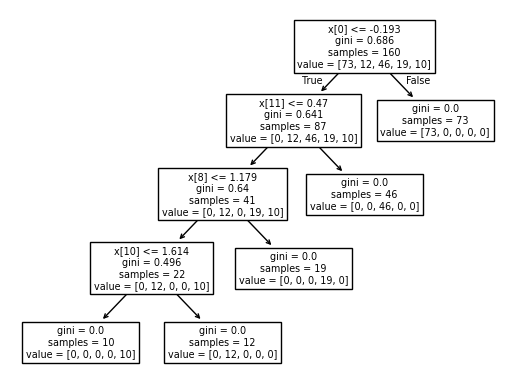

In [ ]:
from sklearn import tree
tree.plot_tree(dt)